In [2]:
# Gerekli olacak kütüphaneler 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Axes3D sadece 3D olarak veri kümemizi çizdirmek için
from mpl_toolkits.mplot3d import Axes3D

(46, 2)
(46, 1)


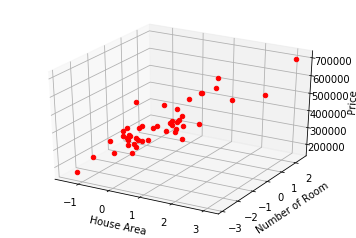

In [3]:
# Veri kümesinin okunması
dataset = pd.read_csv("ex1data2.txt")
X = dataset.iloc[:,0:2].values
Y = dataset.iloc[:,2:].values

X = np.divide((X - np.mean(X, axis=0)), np.std(X, axis=0))
X = (X - np.mean(X, axis=0))

print(X.shape)
print(Y.shape)

# veri kümesinin görselleştirilmesi
X_plot1 = X[:, 0]
X_plot2 = X[:, 1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for xs, ys, zs in zip(X_plot1, X_plot2, Y):
    ax.scatter(xs, ys, zs, c='r')

ax.set_xlabel('House Area')
ax.set_ylabel('Number of Room')
ax.set_zlabel('Price')

# Öğrenme 
theta = np.zeros((3,1))
m = X.shape[0] 
X = np.append(np.ones((X.shape[0],1)).astype(int),values = X,axis=1)
J_history = [] 
alpha = 0.1 

num_iters = 100


In [4]:
# Cost fonksiyonu gerçek y değerleri ile tahmin edilen değerler arasındaki farkı gösterir
def computeCost(X, y, theta):
    return np.sum(np.power( np.dot(X, theta) - y , 2)) / (2*m)

In [5]:
# Eğitim fonksiyonu gradient descent algoritması işletilip theta değerleri güncellenir.
def train(X, Y, theta, alpha, num_iters):
    J_history = []
    
    for i in range(num_iters):        
        delta = (1/m) * np.dot(np.transpose(X), np.dot(X, theta) - Y)
        
        theta = theta - alpha * delta
        
        cost = computeCost(X, Y, theta)
        
        J_history.append(cost)
    
    return theta, J_history
    
    

In [6]:
theta, J_history = train(X, Y, theta, alpha, num_iters)

# Güncellenmiş theta değerleri
print(theta)

[[339110.44903458]
 [109594.77707842]
 [ -5572.08655189]]


Text(0,0.5,'Cost')

<Figure size 432x288 with 0 Axes>

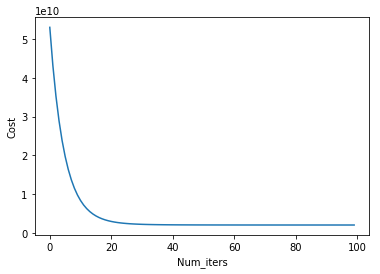

In [7]:
# Eğitilen modelin (Linear regression modeli - eğitilen parametreler theta değerleri)
# gerçekten iyi eğitilip eğitilmediğini görmek için her itration'da elde edilen cost çizdirilir.
plt.clf()
plt.figure()
plt.plot(J_history)            # Gradient descent'in Costumuzu
plt.xlabel("Num_iters")
plt.ylabel("Cost")

Text(0.5,0,'Price')

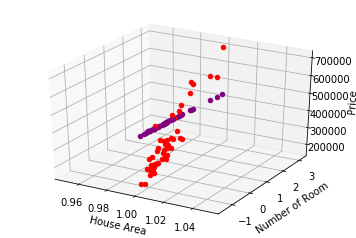

In [8]:
# Eğitilen model ile elde edilen sonuçları çizdirelim
X_plot1 = X[:, 0]
X_plot2 = X[:, 1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for xs, ys, zs in zip(X_plot1, X_plot2, Y):
    ax.scatter(xs, ys, zs, c='r')
    ax.scatter(xs, ys, np.dot(np.array([1, xs, ys]), theta), c='purple')

ax.set_xlabel('House Area')
ax.set_ylabel('Number of Room')
ax.set_zlabel('Price')